<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #10e02c;"> <a href="#part0" style="color:#d910e0; text-decoration:none;">Checking the Distribution Data for Normality</a></p>

<p id="part0"></p>
<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #FF8C00;"> <a href="#part0" style="color:#FF8C00; text-decoration:none;">TABLE OF CONTENT</a></p>


<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part1" style="color:#808080; text-decoration:none;">Importing libraries</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part2" style="color:#808080; text-decoration:none;">Перевірка розподілу на нормальність</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part3" style="color:#808080; text-decoration:none;">QQ-Plot</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part4" style="color:#808080; text-decoration:none;">Критерій Хі-квадрат Пірсона</a></p>


<p id="part1"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Importing libraries</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab 
import math
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import anderson, kstest, shapiro, chisquare
from statsmodels.stats.diagnostic import lilliefors


In [36]:
# https://stackoverflow.com/questions/20124877/css-styling-of-html-in-ipython-notebook-output
# CSS стилі для HTML верстки блокноту:

In [37]:
%%html
<style>
    a:hover {
      background-color: #0099FF;
    }
</style>

<p id="part2"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Перевірка розподілу на нормальність</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

(K-S test) - *Критерій Колмогорова-Смирнова* обчислюється при
відомому середньому і середньоквадратичному відхиленні генеральної
сукупності. Якщо обчислена D-статистика значуща, то гіпотеза про те, що дані
мають нормальний розподіл, відкидається.

*Критерій Ліллієфорса* ([Lilliefors test](https://en.wikipedia.org/wiki/Lilliefors_test)) - обчислюється при невідомому середньому і середньоквадратичному відхиленні (оцінюються за наявними
даними). Якщо обчислена D-статистика значуща, то гіпотеза про те, що дані
мають нормальний розподіл, відкидається. Даний критерій - модифікація критерію Колмогорова-Смирнова

*Критерій Шапіро-Уїлка* (Shapiro – Wilk’s) W test –W - за даними спостережень
обчислюється W-статистика, і якщо вона значуща, гіпотеза про нормальний
характер розподілу відкидається, інакше – приймається.

*Критерій Андерсона — Дарлінга* ([Anderson–Darling](https://uk.wikipedia.org/wiki/Критерій_Андерсона_—_Дарлінга)) - класичний непараметричний критерій узгодженості призначений для перевірки простих гіпотез про належність аналізованої вибірки повністю відомому закону (про узгодженість емпіричного розподілення $\displaystyle F_{n}(x)$ і теоретичного закону $\displaystyle F(x,\theta )$) , тобто для перевірки гіпотези вигляду $\displaystyle H_{0}:F_{n}(x)=F(x,\theta )$ з відомим вектором параметрів теоретичного закону.

[Порівняння тестів на нормальність](http://mathpsy.com/2015/11/15/normality_testing/)


In [38]:
# Сгенеруємо вибірку нормального розподілу з математичним очікуванням та стандартним відхиленням
mean = 0  # математичним очікування
sd = 1    # стандартне відхилення

sample = np.random.normal(loc=mean, scale=sd, size=50)

# Створимо іншу вибірку на основі першої бутстрап методом
sample_two = []
for i in range(len(sample)):
    frac_sample = pd.Series(sample).sample(frac=0.9)
    sample_two.append(frac_sample.mean())

In [39]:
# Нульова гіпотеза свідчить про те що вибірки не відрізняються за розподілом з нормальним
# Тож при значенні p value < 0.05 - розподіл не схожий на нормальний

def conclusions(test):
    def wraper(sample):
        statistic, pvalue = test(sample)
        if pvalue < 0.05:
            print(f'{statistic=} {pvalue=} < 0.05, data does NOT look NORMAL (reject H0)')
            print('!!!')
        else:
            print(f'{statistic=:0.2f} {pvalue=:0.2f} > 0.05, data looks NORMAL (fail to reject H0)')
    return wraper

# Критерій Шапіро-Уїлка        
@conclusions        
def Shapiro(sample):
    print('ShapiroResult')
    statistic, pvalue = stats.shapiro(sample)
    return statistic, pvalue

# Критерій Колмогорова-Смирнова 
@conclusions
def KS(sample):
    print('KstestResult')
    statistic, pvalue = stats.kstest(sample, 'norm')
    return statistic, pvalue

# Критерій Лілієфорса
@conclusions
def Lilliefors_test(sample):
    print('LillieforsResult')
    statistic, pvalue = lilliefors(sample)
    return statistic, pvalue
    
# Критерій Андерсона-Дарлінга
def Anderson_Darling_test(sample):
    print('AndersonDarlingResult')
    result = anderson(sample)
    print('Statistic: %.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            print('!!!')

In [40]:
patients = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
for therapy, group in patients.groupby('Therapy'):
    print(f'========================={therapy}=========================')
    KS(group.expr)
    Lilliefors_test(group.expr)
    Shapiro(group.expr)
    Anderson_Darling_test(group.expr)

=========================A=========================
KstestResult
statistic=1.0 pvalue=0.0 < 0.05, data does NOT look NORMAL (reject H0)
!!!
LillieforsResult
statistic=0.15 pvalue=0.49 > 0.05, data looks NORMAL (fail to reject H0)
ShapiroResult
statistic=0.89 pvalue=0.06 > 0.05, data looks NORMAL (fail to reject H0)
AndersonDarlingResult
Statistic: 0.559
15.000: 0.498, data does not look normal (reject H0)
!!!
10.000: 0.568, data looks normal (fail to reject H0)
5.000: 0.681, data looks normal (fail to reject H0)
2.500: 0.794, data looks normal (fail to reject H0)
1.000: 0.945, data looks normal (fail to reject H0)
=========================B=========================
KstestResult
statistic=1.0 pvalue=0.0 < 0.05, data does NOT look NORMAL (reject H0)
!!!
LillieforsResult
statistic=0.18 pvalue=0.21 > 0.05, data looks NORMAL (fail to reject H0)
ShapiroResult
statistic=0.93 pvalue=0.24 > 0.05, data looks NORMAL (fail to reject H0)
AndersonDarlingResult
Statistic: 0.396
15.000: 0.498, data lo

<p id="part3"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">QQ-Plot</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>

<a href='https://habr.com/ru/post/578754/'>Q-Q Plots. Від "чайника" до професіонала за один гайд</a>

<a href='https://www.statisticshowto.com/q-q-plots/'>Як будуються графіки QQ</a>

Графік QQ (або квантиль-квантиль графік: Quantile-Quantile plots) малює кореляцію між даною вибіркою та нормальним розподілом. Також наноситься опорна лінія з точки 45 градусів. Графіки QQ використовують для візуальної перевірки нормальності даних.


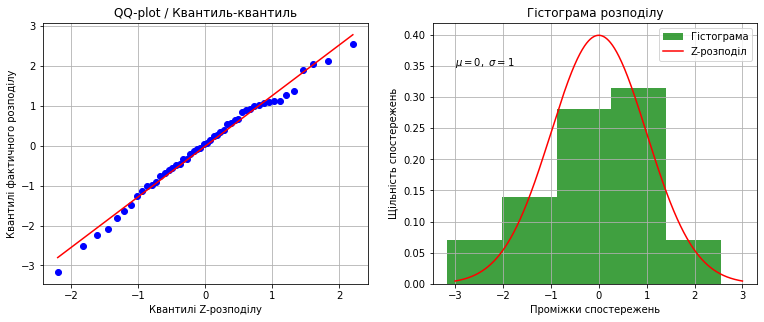

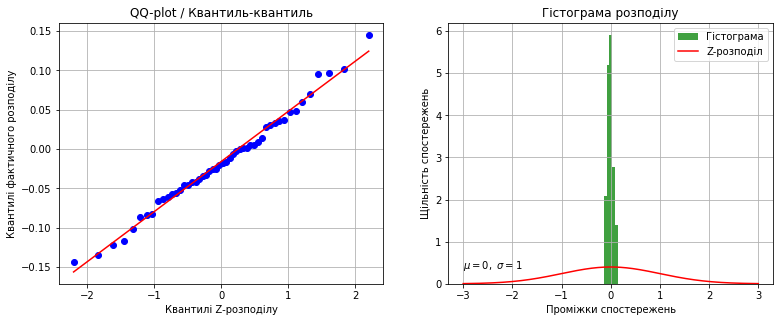

In [41]:
def QQ_and_hist(sample):
    plt.figure(figsize = [6.4*2, 4.8])  # Створюємо фігуру qq_plot
    plt.subplot(1, 2, 1)
    stats.probplot(sample, dist="norm", plot=plt)  # Створюємо графік QQ-plot за допомогою функції пошуку 
    #квантелів значень нашого розподілу

    plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
    plt.xlabel('Квантилі Z-розподілу')  # Підпис по осі X
    plt.ylabel('Квантилі фактичного розподілу')  # Підпис по осі Y
    plt.grid(True)  # Увімкнути сітку


    # Побудуємо гістограму
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(sample, 5, density=True, facecolor='g', alpha=0.75, label='Гістограма')  # Cтроим гистограмму
    plt.title('Гістограма розподілу')  # Заголовок
    plt.xlabel('Проміжки спостережень')  # Підпис по осі X
    plt.ylabel('Щільність спостережень')  # Підпис по осі Y
    plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')  # Текстовий підпис
    plt.grid(True)  # Увімкнути сітку


    # Побудуємо поверх гістограми графік Z-розподілу
    x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Створюємо масив значень Z-розподілу
    plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-розподіл')  # Будуємо графік Z-розподілу
    plt.legend()  # Показати легенду
    plt.show()
    
QQ_and_hist(sample)
QQ_and_hist(sample_two)

<p id="part4"></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Критерій Хі-квадрат Пірсона. Перевірка  відповідності розподілу даних до нормального розподілу</p>

<p style="text-align: right;"><a href="#part0" style="color:lime; text-decoration:none;">зміст</a></p>


In [42]:
# Розрахунки теоретичних частот нормального розподілу
# http://mathhelpplanet.com/static.php?p=kriterii-soglasiya
# http://mathprofi.ru/kriteriy_soglasiya.html
# https://studfile.net/preview/5716282/page:7/
#https://math.semestr.ru/group/hypothesis-testing.php

# Приклад

При рівні значимості 0,05 перевірити гіпотезу про нормальний розподіл генеральної сукупності, якщо відомі емпіричні та теоретичні частоти:

Емпіричні частоти: 6 13 38 74 106 85 30 14

Теоретичні частоти: 3 14 42 82 99 76 37 13

Розрахуємо $\chi^2$ = 7,19, Оскільки pvalue >0.05, немає підстав відкидати нульову гіпотезу. Дані спостережень узгоджуються з гіпотезою про нормальний розподіл генеральної сукупності.

In [43]:
chisquare([6, 13, 38, 74, 106, 85, 30, 14], f_exp=[3, 14, 42, 82, 99, 76, 37, 13])

Power_divergenceResult(statistic=7.194855127140108, pvalue=0.40887768586437173)

# Розрахуємо теоретичні частоти нормального розподілу

In [44]:
class FrequencyDistributionNormal():
    
    def __init__(self, sample):
        self.sample = np.array(sample)
        self.std = self.sample.std()
        self.average = self.sample.mean()
        self.num_intervals = self.get_num_intervals()#
        self.min_value = self.sample.min()
        self.max_value = self.sample.max()
        self.step_intervals = self.get_step_intervals()
        self.groups_intervals = self.get_groups_intervals()
        self.index = self.groups_intervals.index
        self.count_into_intervals, self.mean_into_intervals = self.get_counts_and_means_list()
        self.z_score = self.get_z_score()
        self.f_from_z_score = self.get_f_from_z_score()
        self.frequencies = self.get_frequencies()
        self.corrected_frequency = self.get_corrected_frequency()
     
         
    def get_num_intervals(self):
        """ кількість (m) інтервалів, яка розраховується за формулою:
                                  m = (10 * n)^1/3, 
            де n - обсяг вибірки (кількість елементів сокупності)"""
        return math.ceil((len(self.sample)*10)**(1/3))
    
    def get_step_intervals(self):
        """ крок (h) від інтервалу до наступного інтервалу розраховується інтервал
        за формулою                h = min - max / (m - 1),
        де min, max - мінімальне та максимальне значення елементів виборочної сукупності
        m - кількість інтервалів
        """
        return (self.max_value - self.min_value)/(self.num_intervals-1)
    
    @property
    def amount_of_intervals(self): # get amount_of_intervals value
        return self.num_intervals
           
    @amount_of_intervals.setter
    def set_amount_of_intervals(self, value): # set up amount_of_intervals value
        if value == None:
            self.num_intervals = self.get_amount_of_intervals()
        else:
            self.num_intervals = value
    
    @property
    def sequence_step(self):
        return self.step_intervals
    
    @sequence_step.setter
    def set_sequence_step(self, value):
        if not isinstance(value, (int, float, None)):
            self.step_intervals = self.get_step_intervals()
            raise TypeError('value is not a int or float')
        else:
            self.step_intervals = value

    def get_groups_intervals(self):
        """повертає список з нижньою та верхньою границею кожного інтервала"""
        bins = np.concatenate(([-np.inf], np.arange(self.min_value, self.max_value,
                                                    self.step_intervals), [np.inf]))
        pandas_series = pd.Series(self.sample)
        return pandas_series.groupby(pd.cut(self.sample, bins), observed=True).\
            apply(lambda x: x.to_list())

    def get_counts_and_means_list(self):
        """повертае список з підрахованою кількістю елементів вибіркової сукупності
        в кожному з інтервалів"""
        mean_groups = []
        count_groups = []
        for i in  self.groups_intervals.array:
            mean_groups.append(np.mean(i))
            count_groups.append(len(i))
        return np.array(count_groups), np.array(mean_groups)
        
    def get_z_score(self):
        return (self.mean_into_intervals-self.average)/self.std
    
    def get_f_from_z_score(self):
        f = lambda z, sd: (1/(2*math.pi)**0.5)*math.e**(-((z)**2/(2)))
        return f(self.z_score, self.std)
    
    def get_frequencies(self):
        return (self.f_from_z_score*self.step_intervals/self.std)*self.count_into_intervals.sum()
    
    def get_corrected_frequency(self):
        return (self.count_into_intervals.sum()*self.frequencies)/self.frequencies.sum()
    
    def get_summary_dataframe(self):
        df = pd.DataFrame(index=self.index) 
        df['std'] = self.std
        df['average'] = self.average
        df['m'] = self.num_intervals
        df['h'] = self.step_intervals
        df['mean_group'] = self.mean_into_intervals
        df['count'] = self.count_into_intervals
        df['z'] = self.z_score
        df['f(z)'] = self.f_from_z_score
        df['frequencies'] = self.frequencies
        df['corrected_frequency'] = self.corrected_frequency
       
        return df

In [45]:
observed_freq = [6, 13, 38, 74, 106, 85, 30, 14]
array = np.repeat(range(len(observed_freq)), observed_freq) # сгенеруємо сукупність с експериментальними частотами
FDN = FrequencyDistributionNormal(array)
df = FDN.get_summary_dataframe()
df

,std,average,m,h,mean_group,count,z,f(z),frequencies,corrected_frequency
"(-inf, 0.0]",1.448716,3.928962,16,0.466667,0.0,6,-2.712030,0.010087,1.189251,2.566017
"(0.933, 1.4]",1.448716,3.928962,16,0.466667,1.0,13,-2.021764,0.051679,6.092831,13.146350
"(1.867, 2.333]",1.448716,3.928962,16,0.466667,2.0,38,-1.331497,0.164412,19.383737,41.823803
"(2.8, 3.267]",1.448716,3.928962,16,0.466667,3.0,74,-0.641231,0.324806,38.293813,82.625601
"(3.733, 4.2]",1.448716,3.928962,16,0.466667,4.0,106,0.049035,0.398463,46.977780,101.362778
"(4.667, 5.133]",1.448716,3.928962,16,0.466667,5.0,85,0.739302,0.303546,35.787315,77.217393
"(5.6, 6.067]",1.448716,3.928962,16,0.466667,6.0,30,1.429568,0.143593,16.929281,36.527885
"(6.533, inf]",1.448716,3.928962,16,0.466667,7.0,14,2.119834,0.042181,4.973025,10.730172


порівняємо теоретичні частоти з прикладу $[3, 14, 42, 82, 99, 76, 37, 13]$ та розраховані округлені до цілого $[3, 13, 42, 83, 101, 77, 37, 11]$

In [46]:
theor_freq_from_examp = [3, 14, 42, 82, 99, 76, 37, 13]

In [47]:
chisquare(theor_freq_from_examp, f_exp=df['corrected_frequency'])

Power_divergenceResult(statistic=0.6948327786068427, pvalue=0.9983751250620732)

як бачимо $p \approx 1 $ тобто приймаємо нульову гіпотезу про належність вибіркових сукупностей до однієї генеральної сукупності (з нормальним розподілом)